# Heart Rate Varability (HRV)

NeuroKit2 is the most comprehensive software for computing HRV indices, and the list of features is available below:

| Domains           | Indices |     NeuroKit    | heartpy | HRV | pyHRV |   |
|-------------------|:-------:|:---------------:|:-------:|:---:|:-----:|---|
| Time Domain       |         |                 |         |     |       |   |
|                   |         |       CVNN      |    ✔️    |     |       |   |
|                   |         |       CVSD      |    ✔️    |     |       |   |
|                   |         |       MAD       |         |  ✔️  |       |   |
|                   |         |       MHR       |         |     |   ✔️   |   |
|                   |         |       MRRI      |         |     |   ✔️   |   |
|                   |         |  NNI parameters |         |     |       | ✔️ |
|                   |         | ΔNNI parameters |         |     |       | ✔️ |
|                   |         |      MadNN      |    ✔️    |     |       |   |
|                   |         |      MeanNN     |    ✔️    |     |       |   |
|                   |         |     MedianNN    |    ✔️    |     |       |   |
|                   |         |      MCVNN      |    ✔️    |     |       |   |
|                   |         |      pNN20      |    ✔️    |  ✔️  |       | ✔️ |
|                   |         |      pNN50      |    ✔️    |  ✔️  |   ✔️   | ✔️ |
|                   |         |      RMSSD      |    ✔️    |  ✔️  |   ✔️   | ✔️ |
|                   |         |      SDANN      |         |     |       | ✔️ |
|                   |         |       SDNN      |    ✔️    |  ✔️  |   ✔️   | ✔️ |
|                   |         |    SDNN_index   |         |     |       | ✔️ |
|                   |         |       SDSD      |    ✔️    |  ✔️  |   ✔️   | ✔️ |
|                   |         |       TINN      |    ✔️    |     |       | ✔️ |
| Frequency Domain  |         |                 |         |     |       |   |
|                   |         |       ULF       |    ✔️    |     |       | ✔️ |
|                   |         |       VLF       |    ✔️    |     |   ✔️   | ✔️ |
|                   |         |        LF       |    ✔️    |  ✔️  |   ✔️   | ✔️ |
|                   |         |       LFn       |    ✔️    |     |   ✔️   | ✔️ |
|                   |         |     LF Peak     |         |     |       | ✔️ |
|                   |         |   LF Relative   |         |     |       | ✔️ |
|                   |         |        HF       |    ✔️    |  ✔️  |   ✔️   | ✔️ |
|                   |         |       HFnu      |    ✔️    |     |   ✔️   | ✔️ |
|                   |         |     HF Peak     |         |     |       | ✔️ |
|                   |         |   HF Relative   |         |     |       | ✔️ |
|                   |         |      LF/HF      |    ✔️    |  ✔️  |   ✔️   | ✔️ |
| Non-Linear Domain |         |                 |         |     |       |   |
|                   |         |       SD1       |    ✔️    |  ✔️  |   ✔️   | ✔️ |
|                   |         |       SD2       |    ✔️    |  ✔️  |   ✔️   | ✔️ |
|                   |         |        S        |    ✔️    |  ✔️  |       | ✔️ |
|                   |         |     SD1/SD2     |    ✔️    |  ✔️  |       | ✔️ |
|                   |         |      SampEn     |    ✔️    |     |       | ✔️ |
|                   |         |       DFA       |         |     |       | ✔️ |
|                   |         |       CSI       |    ✔️    |     |       |   |
|                   |         |   Modified CSI  |    ✔️    |     |       |   |
|                   |         |       CVI       |    ✔️    |     |       |   |

## Compute HRV features

The example shows how to use NeuroKit2 to compute heart rate variability (HRV) indices in the time-, frequency-, and non-linear domain.

In [2]:
# Load the NeuroKit package and other useful packages
import neurokit2 as nk
import matplotlib.pyplot as plt

In C:\Users\Zen Juen\Downloads\WPy-3710b\python-3.7.1.amd64\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Zen Juen\Downloads\WPy-3710b\python-3.7.1.amd64\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\Zen Juen\Downloads\WPy-3710b\python-3.7.1.amd64\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [3]:
plt.rcParams['figure.figsize'] = [15, 9]  # Bigger images

## Download Dataset

First, let's download the resting rate data (sampled at 100Hz) using `nk.data()`.

In [4]:
data = nk.data("bio_resting_5min_100hz")
data.head()  # Print first 5 rows

,ECG,PPG,RSP
0,0.003766,-0.102539,0.494652
1,-0.017466,-0.103760,0.502483
2,-0.015679,-0.107422,0.511102
3,-0.001598,-0.110855,0.518791
4,0.002483,-0.112610,0.528669


You can see that it consists of three different signals, pertaining to ECG, PPG (an alternative determinant of heart rate as compared to ECG), and RSP (respiration). Now, let's extract the ECG signal in the shape of a vector (i.e., a one-dimensional array), and find the peaks using [ecg_peaks()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.ecg_peaks).

In [5]:
# Find peaks
peaks, info = nk.ecg_peaks(data["ECG"], sampling_rate=100)

*Note: It is critical that you specify the correct sampling rate of your signal throughout many processing functions, as this allows NeuroKit to have a time reference.*

This produces two elements, `peaks` which is a DataFrame of same length as the input signal in which occurences of R-peaks are marked with 1 in a list of zeros. `info` is a dictionary of the sample points at which these R-peaks occur. 

HRV is the temporal variation between consecutive heartbeats (**RR intervals**). Here, we will use `peaks` i.e. occurrences of the heartbeat peaks, as the input argument in the following HRV functions to extract the indices. 

## Time-Domain Analysis

First, let's extract the time-domain indices.

,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI
0,69.697983,696.395349,62.135891,69.779109,0.089225,0.100084,690.0,44.478,0.064461,14.651163,49.302326,950.0,4.343434


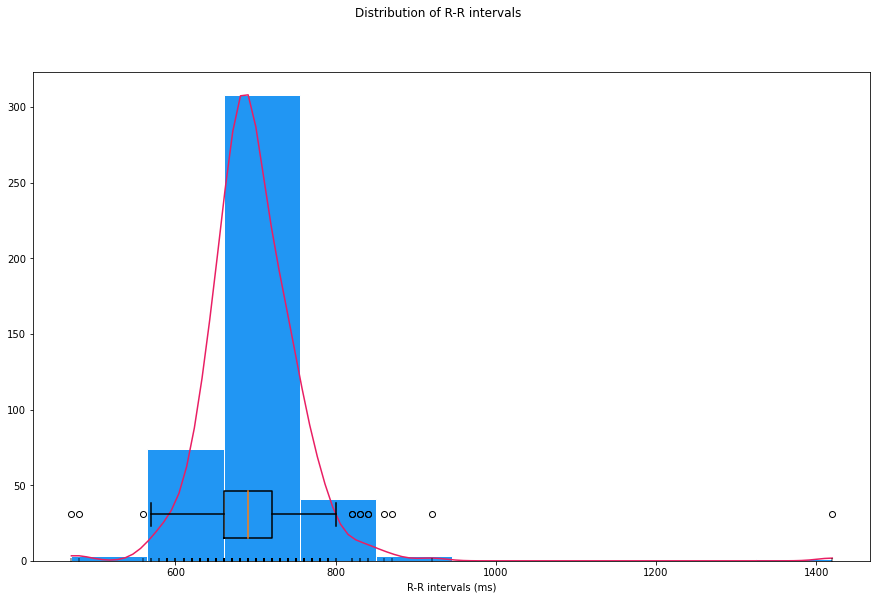

In [6]:
# Extract clean EDA and SCR features
hrv_time = nk.hrv_time(peaks, sampling_rate=100, show=True)
hrv_time

These features include the RMSSD (square root of the mean of the sum of successive differences between adjacent RR intervals), MeanNN (mean of RR intervals) so on and so forth. You can also visualize the distribution of R-R intervals by specifying `show=True` in [hrv_time()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.hrv_time).

## Frequency-Domain Analysis

Now, let's extract the frequency domain features, which involve extracting for example the spectral power density pertaining to different frequency bands. Again, you can visualize the power across frequency bands by specifying `show=True` in [hrv_frequency()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.hrv_frequency).

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,NaN,1168.925644,1586.90506,253.936141,0.736607,0.388377,0.527252,7.369541


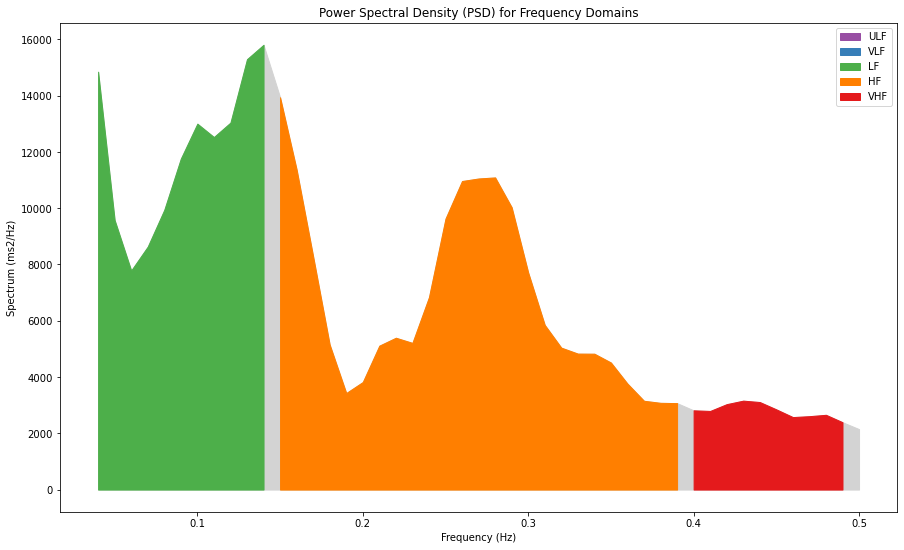

In [7]:
hrv_freq = nk.hrv_frequency(peaks, sampling_rate=100, show=True)
hrv_freq

## Non-Linear Domain Analysis

Now, let's compute the non-linear indices with [hrv_nonlinear()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.hrv_nonlinear).

,HRV_SD1,HRV_SD2,HRV_SD2SD1,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_SampEn
0,49.341281,85.461606,1.732051,1.732051,4.829101,592.095372,1.259931


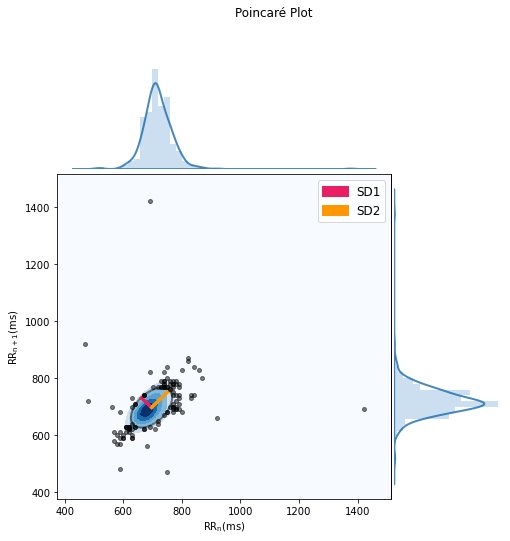

In [10]:
hrv_non = nk.hrv_nonlinear(peaks, sampling_rate=100, show=True)
hrv_non

This will produce a Poincaré plot which plots each RR interval against the next successive one.

## All Domains

Finally, if you'd like to extract HRV indices from all three domains, you can simply input `peaks` into [hrv()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.hrv), where you can specify `show=True` to visualize the combination of plots depicting the RR intervals distribution, power spectral density for frequency domains, and the poincare scattergram.

,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_pNN50,...,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD2SD1,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_SampEn
0,69.697983,696.395349,62.135891,69.779109,0.089225,0.100084,690.0,44.478,0.064461,14.651163,...,0.388377,0.527252,7.369541,49.341281,85.461606,1.732051,1.732051,4.829101,592.095372,1.259931


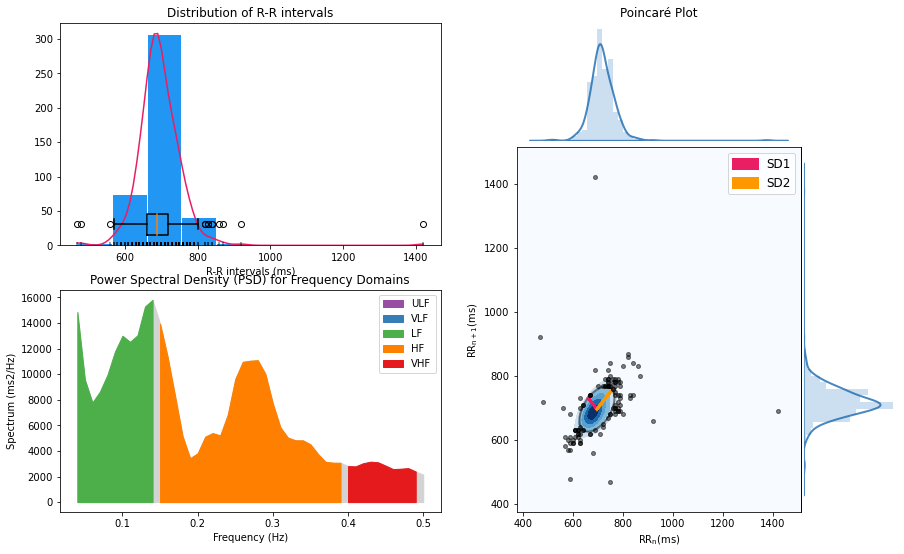

In [11]:
hrv_indices = nk.hrv(peaks, sampling_rate=100, show=True)
hrv_indices

## Resources

There are several other packages more focused on HRV in which you might find a more in depth explanation and documentation. See their documentation here:

- [HeartPy](https://python-heart-rate-analysis-toolkit.readthedocs.io/en/latest/)
- [HRV](https://hrv.readthedocs.io/en/latest/)
- [pyHRV](https://pyhrv.readthedocs.io/en/latest/_pages/api/nonlinear.html)